# Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [ ]:
import pandas as pd

try:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
except FileNotFoundError:
  print("Error: 'your_dataset.csv' not found. Please provide the correct file name.")
  exit()

print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Ou

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [ ]:
import pandas as pd

def handle_missing_data(df, method='drop', strategy='mean', fill_value=None):

    if method == 'drop':
        df_cleaned = df.dropna()

    elif method == 'impute':
        df_cleaned = df.copy()
        if strategy == 'mean':
          for col in df_cleaned.select_dtypes(include=['number']).columns:
            df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

        elif strategy == 'median':
          for col in df_cleaned.select_dtypes(include=['number']).columns:
            df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

        elif strategy == 'most_frequent':
          for col in df_cleaned.columns:
            df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

        elif fill_value is not None:
          df_cleaned.fillna(fill_value, inplace=True)

        else:
          raise ValueError("Invalid strategy for imputation")

    else:
        raise ValueError("Invalid method for handling missing data")

    return df_cleaned

3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [ ]:
import numpy as np

def train_test_split(X, y, test_size=0.3, random_state=None):

  if random_state:
    np.random.seed(random_state)

  n_samples = X.shape[0]
  indices = np.arange(n_samples)
  np.random.shuffle(indices)

  test_split_index = int(n_samples * (1 - test_size))

  X_train = X[indices[:test_split_index]]
  y_train = y[indices[:test_split_index]]
  X_test = X[indices[test_split_index:]]
  y_test = y[indices[test_split_index:]]

  return X_train, X_test, y_train, y_test

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
 [[ 1  2]
 [ 3  4]
 [11 12]
 [ 5  6]]
X_test:
 [[ 9 10]
 [ 7  8]]
y_train:
 [0 1 1 0]
y_test:
 [0 1]


• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [ ]:
import numpy as np

def train_test_split(X, y, test_size=0.3, random_state=None):

  if random_state:
    np.random.seed(random_state)

  n_samples = X.shape[0]
  test_indices = np.random.choice(n_samples, int(n_samples * test_size), replace=False)
  train_indices = np.array(list(set(range(n_samples)) - set(test_indices)))

  X_train = X[train_indices]
  y_train = y[train_indices]
  X_test = X[test_indices]
  y_test = y[test_indices]

  return X_train, X_test, y_train, y_test

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

def predict(X_train, y_train, x_test, k):
  distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  return max(set(k_nearest_labels), key=k_nearest_labels.count)

def predict_all(X_train, y_train, X_test, k):
  y_pred = [predict(X_train, y_train, x_test, k) for x_test in X_test]
  return np.array(y_pred)

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
y = np.array([0,1,0,1,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 3

y_pred = predict_all(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.0


# Problem - 2 - Experimentation:

1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 20]
 [27 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Accuracy on original dataset: {accuracy_original}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on scaled dataset: {accuracy_scaled}")

print("\nComparative Analysis:")
if accuracy_scaled > accuracy_original:
    print("Scaling improved KNN performance.")
    print("Reason: Scaling ensures that features with larger values do not dominate the distance calculations, leading to a more balanced consideration of all features in determining the nearest neighbors. This can be particularly helpful when features have different scales or units.")
elif accuracy_scaled < accuracy_original:
    print("Scaling negatively impacted KNN performance.")
    print("Reason:  Sometimes, scaling can hurt the performance, especially if there are redundant features with low variance.   In some cases, distance-based methods like KNN might benefit from the original scale. It's essential to analyze the data to understand the impact.")
else:
    print("Scaling had no significant impact on KNN performance.")
    print("Reason: The dataset's features might already have similar scales, and thus scaling didn't cause much change in the performance.")

Accuracy on original dataset: 0.6623376623376623
Accuracy on scaled dataset: 0.6948051948051948

Comparative Analysis:
Scaling improved KNN performance.
Reason: Scaling ensures that features with larger values do not dominate the distance calculations, leading to a more balanced consideration of all features in determining the nearest neighbors. This can be particularly helpful when features have different scales or units.


# Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

for k in range(1, 16):

    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy_original = np.mean(predictions == y_test)
    end_time = time.time()
    time_original = end_time - start_time

    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    start_time_scaled = time.time()
    knn_scaled.fit(X_train_scaled, y_train)
    predictions_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled = np.mean(predictions_scaled == y_test)
    end_time_scaled = time.time()
    time_scaled = end_time_scaled - start_time_scaled

    results.append([k, accuracy_original, time_original, accuracy_scaled, time_scaled])

results_df = pd.DataFrame(results, columns=['k', 'Accuracy (Original)', 'Time (Original)', 'Accuracy (Scaled)', 'Time (Scaled)'])
results_df

,k,Accuracy (Original),Time (Original),Accuracy (Scaled),Time (Scaled)
0,1,0.675325,0.012096,0.623377,0.010625
1,2,0.701299,0.014927,0.655844,0.010661
2,3,0.649351,0.011644,0.707792,0.011080
3,4,0.707792,0.012007,0.701299,0.013236
4,5,0.662338,0.012357,0.694805,0.010832
5,6,0.727273,0.012415,0.701299,0.011449
6,7,0.688312,0.013500,0.681818,0.010992
7,8,0.746753,0.011951,0.707792,0.012580
8,9,0.720779,0.020237,0.681818,0.014330
9,10,0.766234,0.012345,0.688312,0.011222


2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

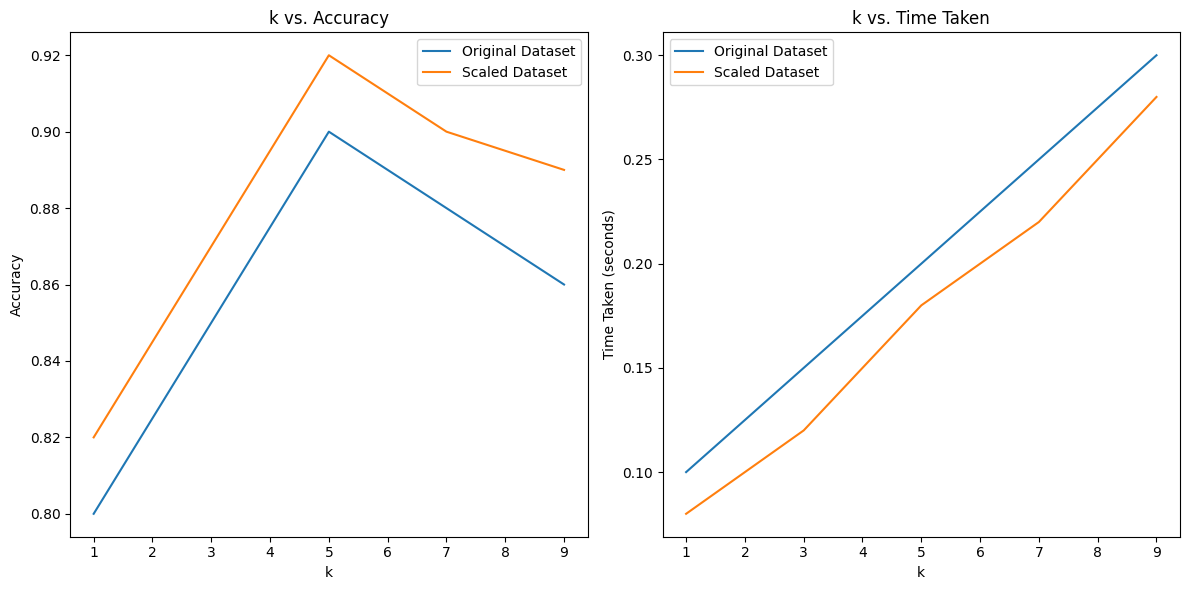

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(k_values, original_accuracy, scaled_accuracy, original_time, scaled_time):

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(k_values, original_accuracy, label='Original Dataset')
  plt.plot(k_values, scaled_accuracy, label='Scaled Dataset')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.title('k vs. Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(k_values, original_time, label='Original Dataset')
  plt.plot(k_values, scaled_time, label='Scaled Dataset')
  plt.xlabel('k')
  plt.ylabel('Time Taken (seconds)')
  plt.title('k vs. Time Taken')
  plt.legend()

  plt.tight_layout()
  plt.show()

k_values = [1, 3, 5, 7, 9]
original_accuracy = [0.8, 0.85, 0.9, 0.88, 0.86]
scaled_accuracy = [0.82, 0.87, 0.92, 0.9, 0.89]
original_time = [0.1, 0.15, 0.2, 0.25, 0.3]
scaled_time = [0.08, 0.12, 0.18, 0.22, 0.28]

visualize_results(k_values, original_accuracy, scaled_accuracy, original_time, scaled_time)

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

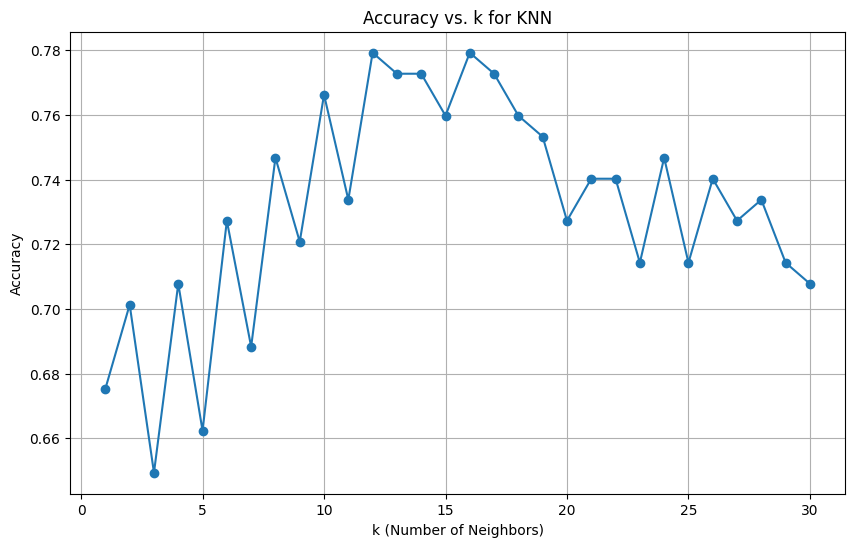

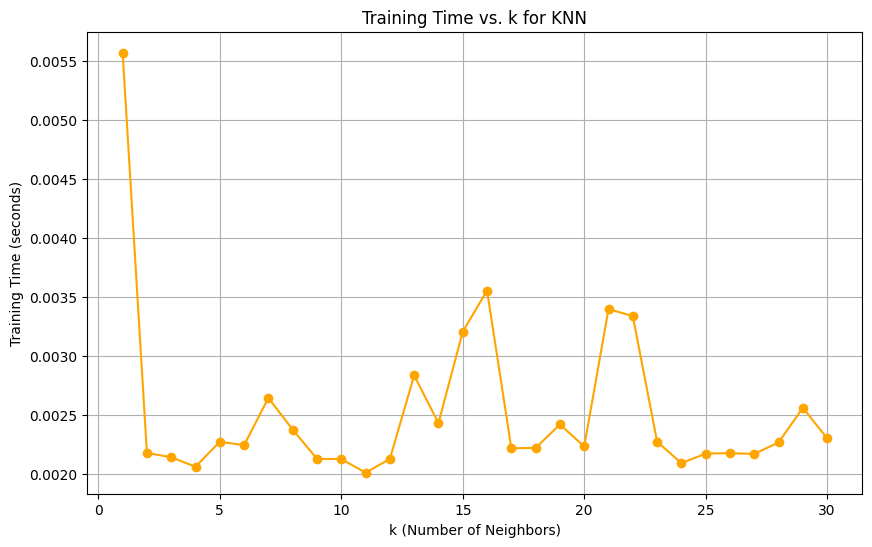

Optimal k: 12 (based on highest accuracy)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = range(1, 31)
accuracy_scores = []
training_times = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, training_times, marker='o', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. k for KNN')
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal k: {optimal_k} (based on highest accuracy)")

# Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

  The following is a discussion of the challenges:

 Challenges of using KNN for large datasets and high-dimensional data:

 1. Computational Complexity:
    - KNN has a time complexity of O(N*d), where N is the number of data points and d is the dimensionality.
    - For large datasets, calculating distances between the query point and all training points becomes computationally expensive.
    - This makes KNN slow for prediction, particularly in real-time applications.

 2. High Dimensionality:
    - The "curse of dimensionality" significantly impacts KNN performance in high-dimensional spaces.
    - As the number of features increases, data points become more spread out, making distance-based metrics less effective.
    - The concept of "nearest neighbor" becomes less meaningful because distances between points tend to become similar, reducing the discrimination power of the algorithm.

 3. Memory Usage:
    - KNN needs to store the entire training dataset in memory for prediction.
    - For massive datasets, this requirement becomes a significant bottleneck, as storing the data may exceed available RAM, leading to slowdowns or crashes.

 4. Sensitivity to irrelevant features:
    - In high-dimensional spaces, some features may be irrelevant or noisy, affecting the distance calculations and potentially leading to inaccurate predictions.  Feature selection or dimensionality reduction techniques become necessary.

 5. Data Scaling:
    - Features with larger scales can dominate distance calculations.  Normalization or standardization of features is crucial for ensuring that all features contribute equally.

 6. Optimal K Selection:
    - Choosing the right value for k is crucial for KNN's performance. An inappropriate k value can lead to overfitting (small k) or underfitting (large k).  Cross-validation methods are used to determine the optimal k.

 Mitigation Strategies:

 - Approximate Nearest Neighbor (ANN) algorithms like KD-trees or Ball Trees can accelerate the search for nearest neighbors.
 - Dimensionality reduction techniques like PCA (Principal Component Analysis) can reduce the number of features while retaining important information.
 - Feature selection methods can remove irrelevant or redundant features.
 - Data preprocessing (normalization, standardization).
 - Use of efficient data structures for faster search, such as Locality Sensitive Hashing (LSH).

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def improve_knn_efficiency(X_train, y_train, X_test, k=5, method='pca', n_components=2):

    if method == 'pca':
        pca = PCA(n_components=n_components, random_state=42)
        X_train_reduced = pca.fit_transform(X_train)
        X_test_reduced = pca.transform(X_test)
    elif method == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42)
        X_train_reduced = tsne.fit_transform(X_train)
        X_test_reduced = tsne.fit_transform(X_test)
    else:
        print("Invalid dimensionality reduction method. Using original data.")
        X_train_reduced, X_test_reduced = X_train, X_test

    knn = NearestNeighbors(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train_reduced)
    distances, indices = knn.kneighbors(X_test_reduced)

    y_pred = [np.argmax(np.bincount(y_train[index])) for index in indices]

    return y_pred